In [41]:
import pandas as pd
import numpy as np
import json
import re

In [8]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

/tmp/ipykernel_8034/3218800172.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'title': title, 'comment': comment}, ignore_index=True)
/tmp/ipykernel_8034/3218800172.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'title': title, 'comment': comment}, ignore_index=True)
/tmp/ipykernel_8034/3218800172.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'title': title, 'comment': comment}, ignore_index=True)
/tmp/ipykernel_8034/3218800172.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'title': title, 'comment': comment}, ignore_index=True)
/tmp/ipykernel_8034/

In [9]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [10]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [11]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3]
    return text

In [12]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [13]:
df.head()

,title,comment
0,All the cool kids are doing it.,"[pepe, what, body]"
1,All the cool kids are doing it.,"[https, youtube, watch, svsoh]"
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian..."
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, quot, ..."
4,All the cool kids are doing it.,"[vatniggers, meat, grinder]"


In [14]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [16]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [17]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

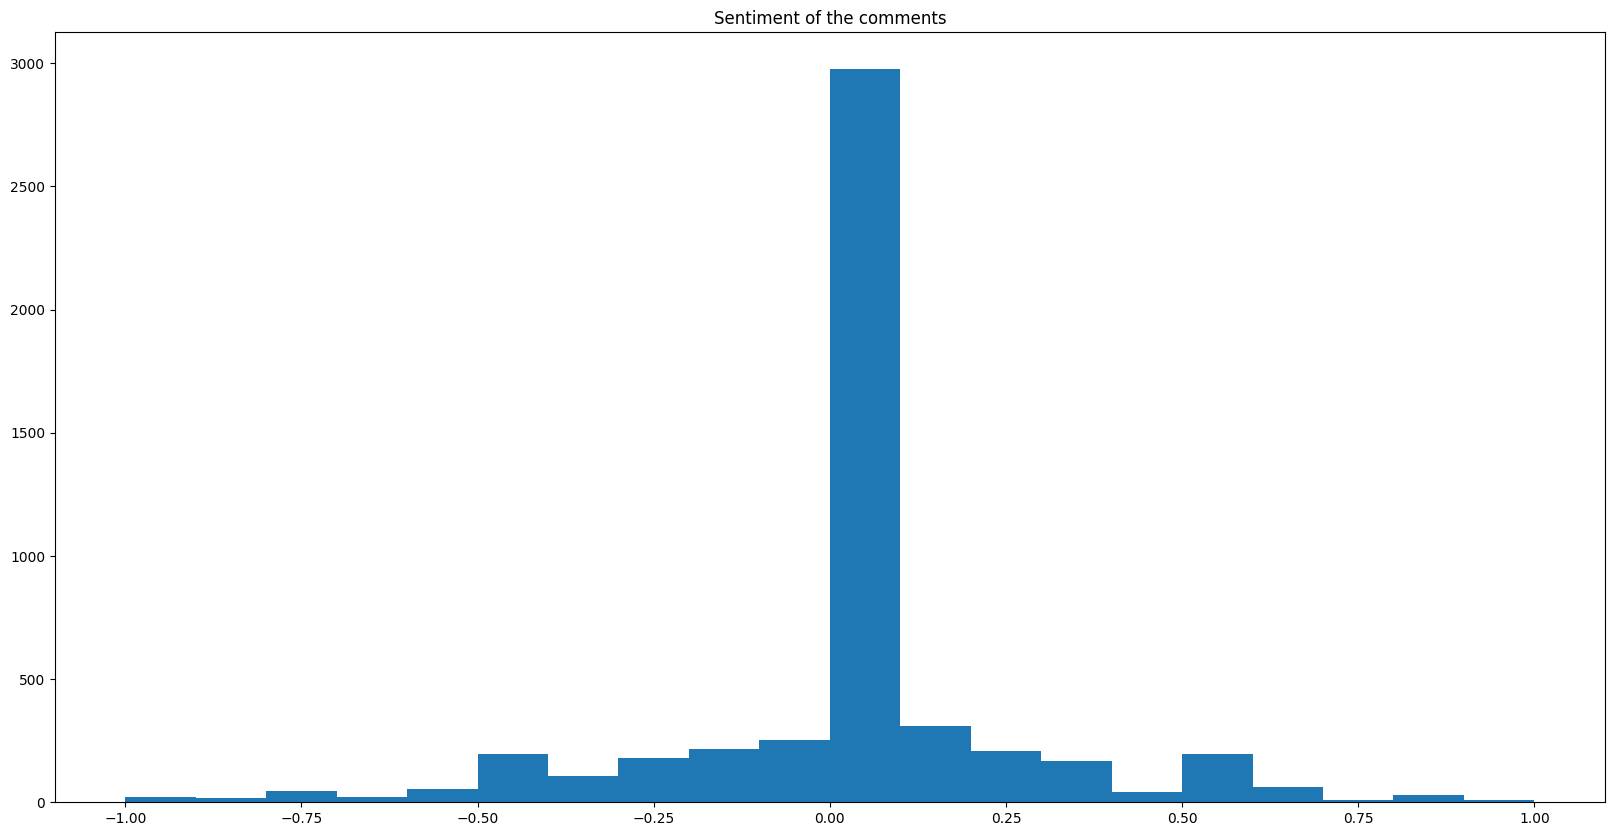

In [18]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title('Sentiment of the comments')
plt.hist(df['sentiment'], bins=20)
plt.show()

In [19]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,length,sentiment
695,Are you britbros?,"[retards, therethis, ireland, outthose, retard...",7,-0.900000
2730,"1. N. Spain, S. France and N. Italians2. S. Sp...","[brown, hands, idiots]",3,-0.800000
3706,This is supposed to be the strongest military ...,"[fucking, iraq, what]",3,-0.600000
929,Reading the article on RT about the attack of ...,"[guys, they, shit, couple, worthless, civilian...",8,-0.533333
29,Kanye West is a controlled opposition deceiver...,"[kike, anon, kikeholy, pathetic, topkek]",5,-1.000000


In [20]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,length,sentiment
1315,Why are so many Canadians so obedient to their...,"[anglo, faggot, person, culture, their, city, ...",15,0.8
679,I’ve been talking to a Russian girl for a whil...,[lmao],1,0.6
824,I dont think we laugh at zogbots dying for jew...,"[nice, photoshop]",2,0.6
416,&gt;become PM&gt;queens dies after your first ...,"[boris, good, himself, brits]",4,0.7
1171,Christkikes are kikes with low IQ and they cre...,"[brazilian, lmao]",2,0.6


In [21]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

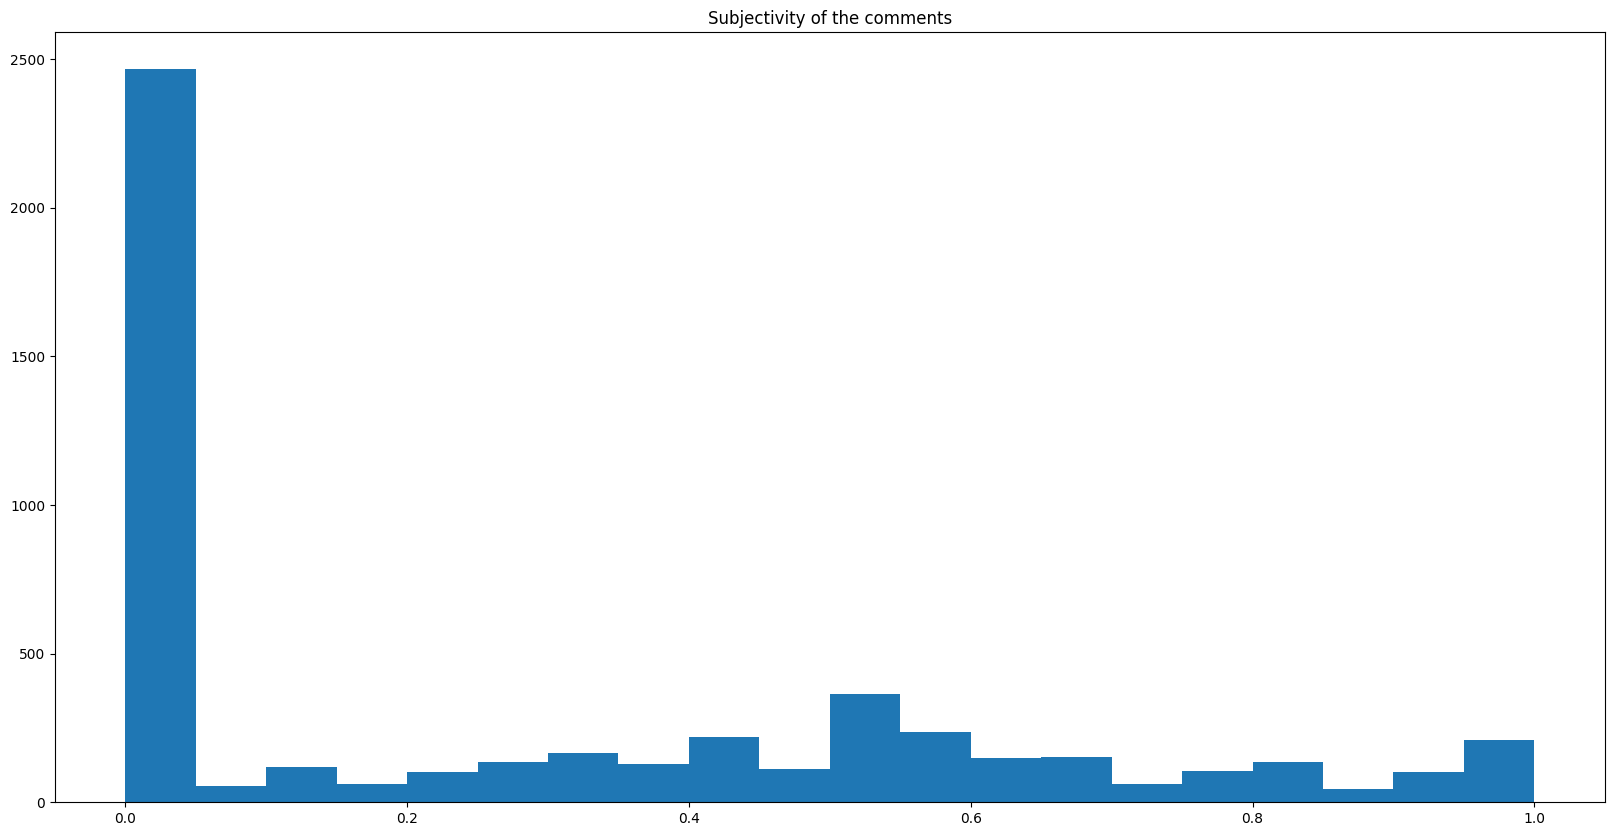

In [22]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.title("Subjectivity of the comments")
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [23]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
1600,This supermodel seems unhappy with her success...,"[gravy, colossal, fucking, faggot, that]",5,-0.150,0.800
5042,"&quot;After these bastards starts to starve, t...","[fireworks, past, hour, retards, horns]",5,-0.575,0.625
1180,I support the elites. I work with the capitali...,"[genocide, planet, population, evidence, civil...",9,0.000,0.750
2387,Not blue = Subhuman,"[venezuelans, most, venezuelans, drinking, wat...",8,0.550,0.750
3845,Whites are an international minority group.,"[fucking, nigger]",2,-0.600,0.800


In [24]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
316,What’s the /pol/ approved age to get married? ...,"[your, married, kids, meme]",4,0.250000,0.250000
3614,VAXXIES ONCE AGAIN ON SUICIDE WATCH (WHICH IS ...,"[bong, coroner, vaxxie, anybody, incidence, pa...",10,0.000000,0.000000
4220,People are genuinely curious about the JQ. Pos...,"[story, rothschilds, england, france, british,...",7,0.000000,0.000000
2985,Khokols and Russomutts are both subhuman and I...,"[https, files, catbox, xmdxrm]",4,0.000000,0.000000
1188,Is &quot;Uprising&quot; the most based song/ly...,"[muse, band, that, label, rage, machine, bunch...",20,-0.235714,0.407143


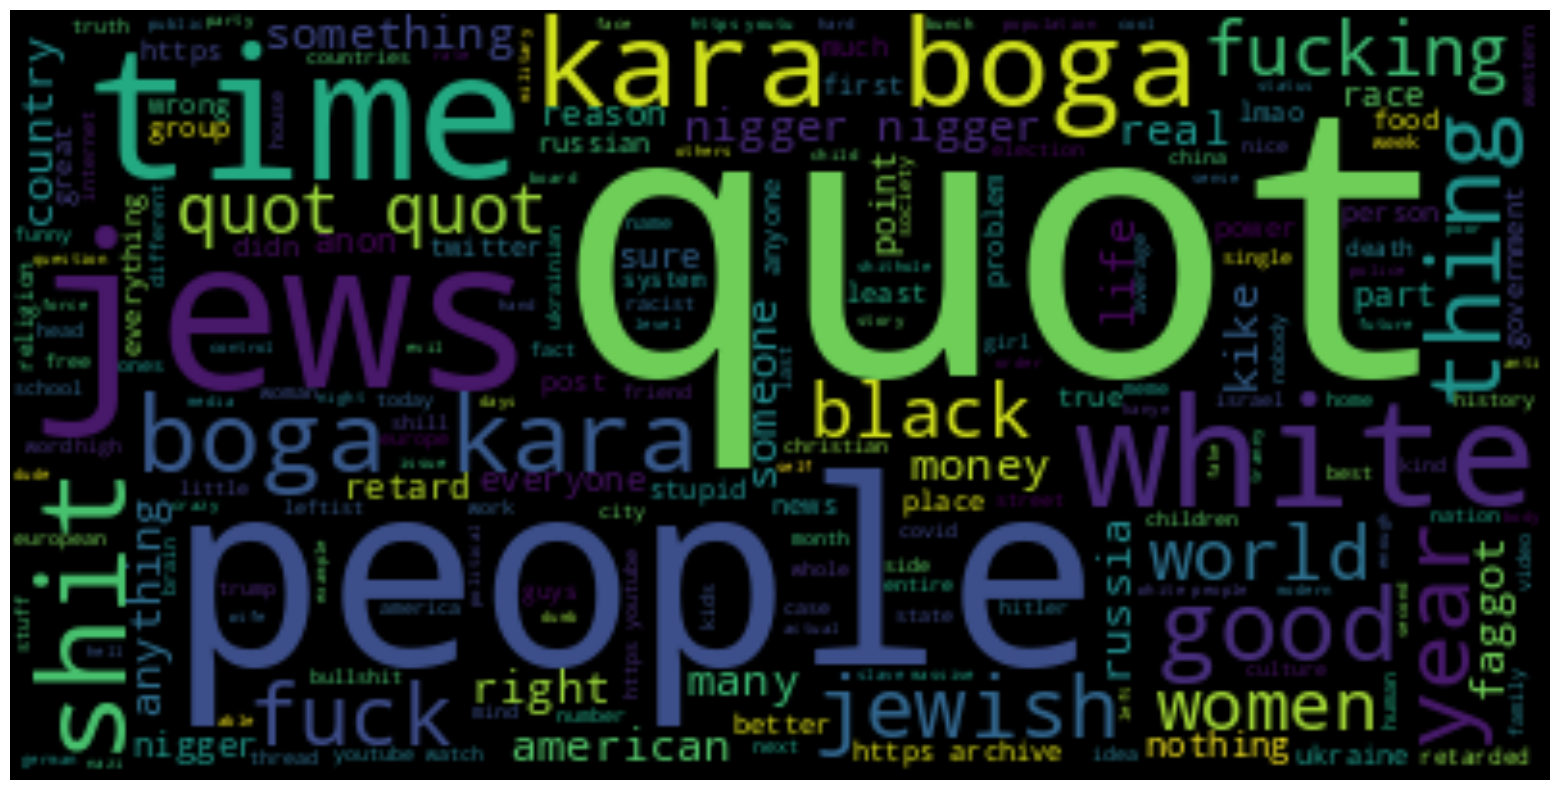

In [26]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

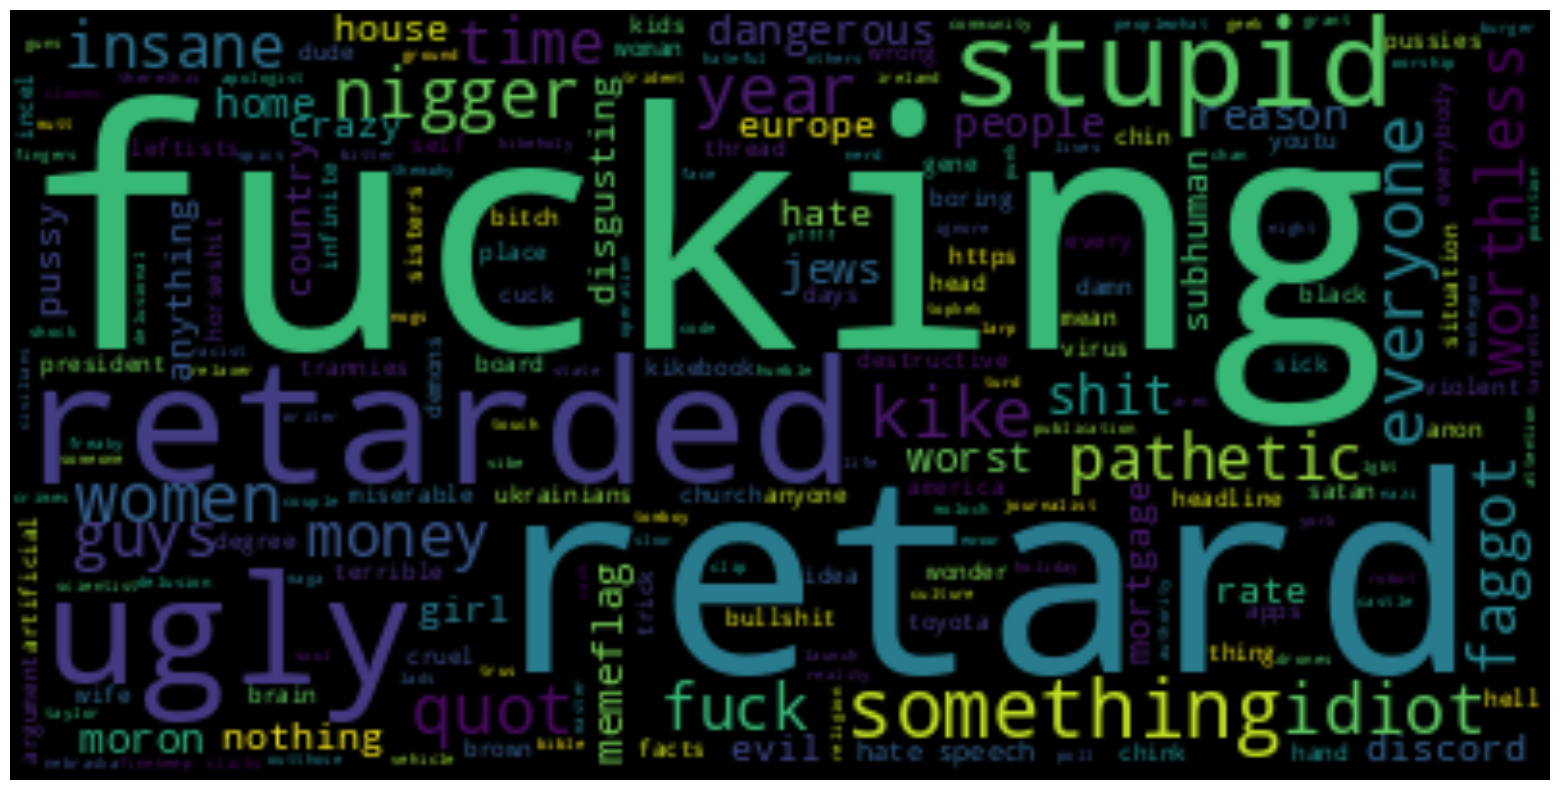

In [27]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())

In [29]:
# check how many total words are in the comments
total_words = len(all_comments.split())
total_words

42974

In [30]:
# check how many average words are in the comments
average_words_by_comment = len(all_comments.split()) / len(df)
average_words_by_comment

8.383534920015606

## Hate Speech Analysis
### Measuring hate speech by grabing a corpus of racial slurs and demeaning words and comparing them to the frequency of those words in a given text. After which we come up with a percentage of the frequency of these terms in our parsed text

In [31]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../ethnic_slurs.csv')
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [32]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [33]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [34]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

,title,comment,length,sentiment,subjectivity,hate_score
0,All the cool kids are doing it.,"[pepe, what, body]",3,0.00,0.00,0
1,All the cool kids are doing it.,"[https, youtube, watch, svsoh]",4,0.00,0.00,0
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.20,0.30,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, quot, ...",13,0.15,0.65,0
4,All the cool kids are doing it.,"[vatniggers, meat, grinder]",3,0.00,0.00,1


In [35]:
df.head(20)

,title,comment,length,sentiment,subjectivity,hate_score
0,All the cool kids are doing it.,"[pepe, what, body]",3,0.000000,0.000000,0
1,All the cool kids are doing it.,"[https, youtube, watch, svsoh]",4,0.000000,0.000000,0
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, quot, ...",13,0.150000,0.650000,0
4,All the cool kids are doing it.,"[vatniggers, meat, grinder]",3,0.000000,0.000000,1
5,&gt;Two 16-year-old twins escaped from their a...,"[something, some]",2,0.000000,0.000000,0
6,&gt;Two 16-year-old twins escaped from their a...,[test],1,0.000000,0.000000,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1
8,&gt;Two 16-year-old twins escaped from their a...,"[true, bolivian]",2,0.350000,0.650000,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0


In [36]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

,title,comment,length,sentiment,subjectivity,hate_score
4976,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113
5087,your corrupt right wing politicians are crumbl...,"[this, spam, thread, faggot, niggers, obvious,...",88,0.000000,0.500000,22
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16
3119,Even Reddit of all places is not buying it any...,"[they, they, disproportional, amount, whites, ...",100,0.010667,0.342667,14
1788,I believe this guy opposed the kike spike. Obv...,"[links, social, media, https, atlasobscura, ar...",71,0.012222,0.324815,11


In [37]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
0,All the cool kids are doing it.,"[pepe, what, body]",3,0.00,0.00,0,0.000000
1,All the cool kids are doing it.,"[https, youtube, watch, svsoh]",4,0.00,0.00,0,0.000000
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.20,0.30,1,12.500000
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, quot, ...",13,0.15,0.65,0,0.000000
4,All the cool kids are doing it.,"[vatniggers, meat, grinder]",3,0.00,0.00,1,33.333333


In [38]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.08%'

## Lets try to measure female discrimination by looking for comments that have similar words to 'female' that have a negative sentiment score

In [45]:
def most_similar(word, topn=10):
    word = nlp.vocab[str(word)]
    queries = [
        w for w in word.vocab 
        if w.is_lower == word.is_lower and w.prob >= -15 and np.count_nonzero(w.vector)
    ]

    by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
    return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]


In [44]:
most_similar('dog')

[]